# Exploratory Data Analysis on the PISA2012 Dataset
## by Mohammed Aljudaibi

## Investigation Overview
### This presentation explores the how students preformered in the PISA tests around the world 

## Dataset Overview
### The Program for International Student Assessment, PISA 2012 dataset, consists of information on 485,490 students, with features such as their country and scores in Math, Science and Reading tests.

In [21]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### GeoPandas for map plots

In [22]:
#importing geopandas to perform map plots
import geopandas as gpd
#reading countries dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#removing Antartica from the map to make it look neater
world = world[world.name != 'Antarctica']
#renaming Czechia to match the PISA dataset
world["name"].replace({'Czechia': 'Czech Republic'}, inplace = True)

In [23]:
df = pd.read_csv("pisa2012.csv", encoding='latin-1', index_col=0, low_memory=False)

### Replacing/Renaming to be able to match both dataframes

In [24]:
#change state/city to country, also rename some countries
df["CNT"].replace({
    'Massachusetts (USA)': 'United States of America',
    'Connecticut (USA)': 'United States of America',
    'Florida (USA)': 'United States of America',
    'China-Shanghai': 'China',
    'Chinese Taipei': 'China',
    'Czech Republic': 'China',
    'Hong Kong-China': 'China',
    'Macao-China': 'China',
    'Perm(Russian Federation)': 'Russia',
    'Russian Federation': 'Russia',
    'Korea': 'South Korea',
    'Slovak Republic': 'Slovakia'
}, inplace = True)

### What is the proportion of the students genders?

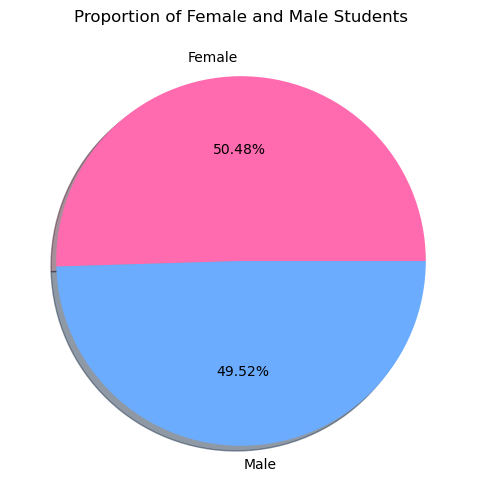

In [25]:
gender = df["ST04Q01"].value_counts()
gender.plot(kind="pie", figsize=(6,6), autopct='%1.2f%%', shadow=True, colors=["#FF6BAE", "#6BACFF"], ylabel='')
plt.title("Proportion of Female and Male Students");

### How did female and male students score in the tests?

In [42]:
def subplotsHist(x, subject, title):
    """
    1d histogram subplot

    Parameters:-
        x: x in axes as int
        subject: subject name in the dataframe as String
        title: subject name as String
    """
    binsize = 15
    bins = np.arange(0, df[subject].max(), binsize)

    axes[x].hist(data=females, x=subject, bins=bins, label="Female", alpha=0.5, color="#FF6BAE")
    axes[x].hist(data=males, x=subject, bins=bins, label="Male", alpha=0.5, color="#6BACFF")
    axes[x].set_xlabel(f"{title} Score")

In [27]:
males = df[df["ST04Q01"]=="Male"]
females = df[df["ST04Q01"]=="Female"]

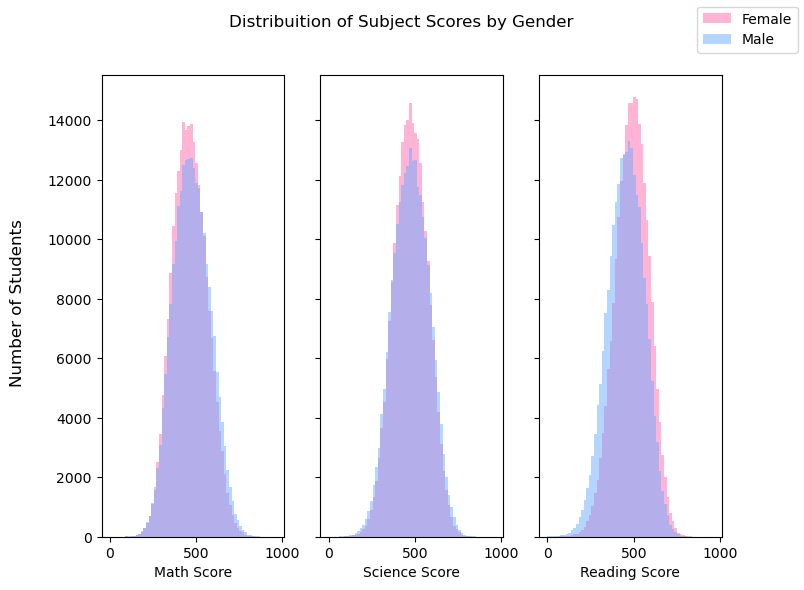

In [43]:
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True)
#making subplots for the 3 subjects
subplotsHist(0, "PV1MATH", "Math")
subplotsHist(1, "PV1SCIE", "Science")
subplotsHist(2, "PV1READ", "Reading")
#adding relevent info
fig.text(0.02, 0.5, 'Number of Students', ha='center', va='center', rotation='vertical', size=12)
fig.set_size_inches(8,6)
plt.figlegend(["Female", "Male"])
fig.suptitle("Distribuition of Subject Scores by Gender", size=12);

### How are the countries that partook in the PISA2012 split in terms of OECD?

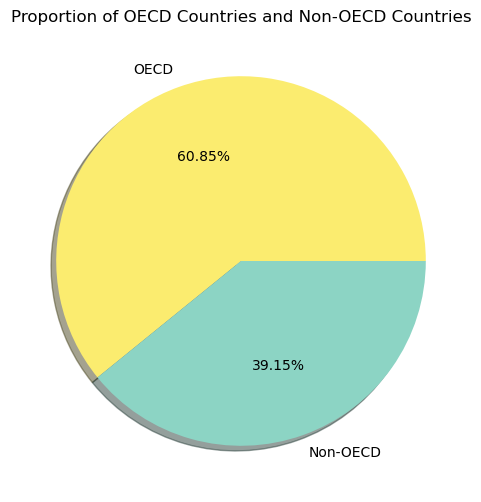

In [29]:
OECD = df["OECD"].value_counts()
OECD.plot(kind="pie", figsize=(6,6), autopct='%1.2f%%', shadow=True, colors=["#fbec6f", "#8cd4c4"], ylabel='');
plt.title("Proportion of OECD Countries and Non-OECD Countries");

### Which countries are a part of the Organization for Economic Co-operation and Development (OECD)?

In [30]:
#list of countries in the PISA dataset
countries = df["CNT"].unique()

for i in range(len(world)+1):
    if i == 159:
        continue 
    if world.loc[i, "name"] in countries:
        #get location of the first instance of the country in df and get its OECD value
        location = df["CNT"].values.searchsorted(world.loc[i, "name"], side='right')
        oecd = df.loc[location, "OECD"]
        #give value for OECD in world
        if oecd == "OECD":
            world.loc[i, "OECD"] = "OECD"
        else:
            world.loc[i, "OECD"] = "Non-OECD"
    else:
        world.loc[i, "OECD"] = np.nan

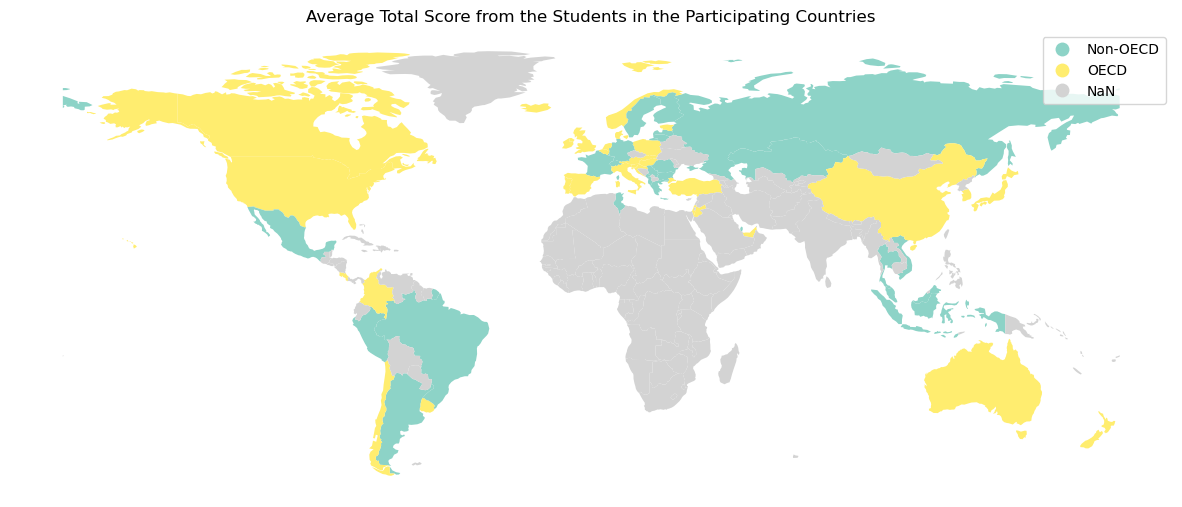

In [31]:
world.plot(column="OECD", 
           figsize=(15, 10), 
           missing_kwds={'color': 'lightgrey'}, 
           legend=True,
           cmap="Set3");
plt.title("Average Total Score from the Students in the Participating Countries")
plt.axis("off");

### How did the countries around the world perform in the PISA tests?

In [32]:
#make new column in df for the combined score for all three tests
df["combined_score"] = df["PV1MATH"] + df["PV1SCIE"] + df["PV1READ"]
#group countries by their mean combined score
mean_scores = df.groupby("CNT").mean()["combined_score"]
mean_scores.to_dict;

In [33]:

#for the pisa participating countries in world, store the average combined_score
for i in range(len(world)):
    if i == 159:
        continue 
    if world.loc[i, "name"] in countries:
        world.loc[i, "combined_score"] = mean_scores[world.loc[i ,"name"]]
    else:
        world.loc[i, "combined_score"] = np.nan

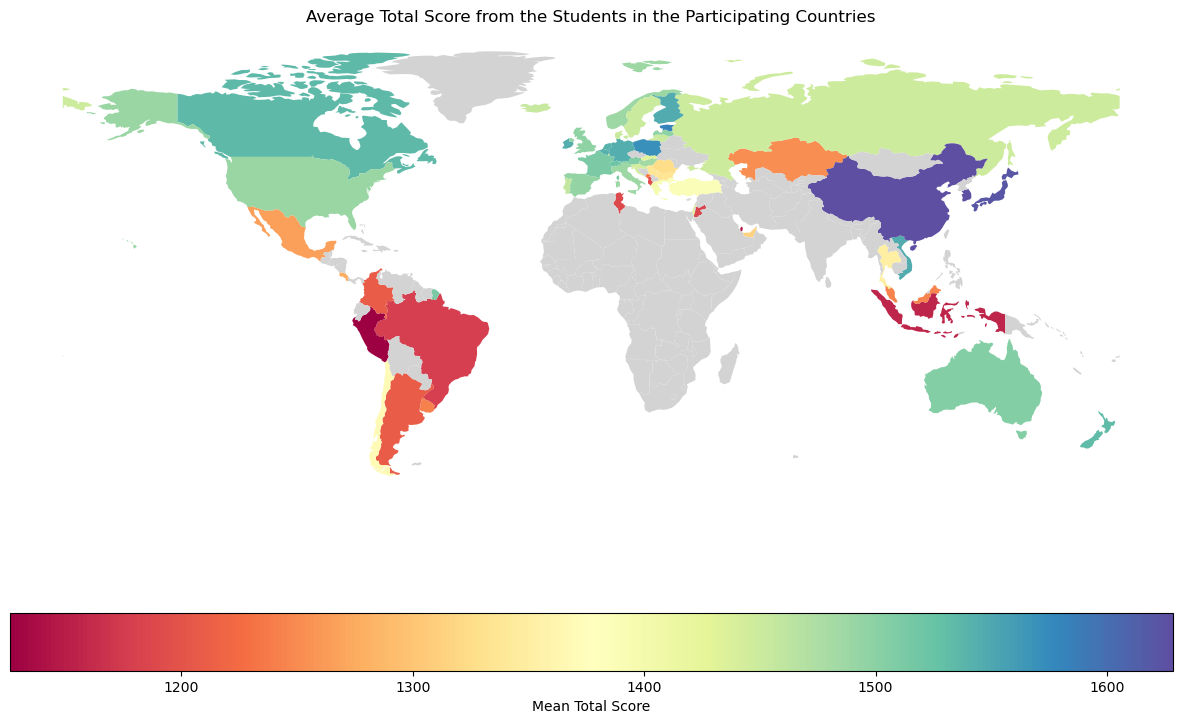

In [34]:
world.plot(column="combined_score", 
           figsize=(15, 10), 
           missing_kwds={'color': 'lightgrey'}, 
           legend=True,
           cmap="Spectral",
           legend_kwds={'label': 'Mean Total Score',
                       'orientation': 'horizontal'});
plt.title("Average Total Score from the Students in the Participating Countries")
plt.axis("off");

# Thank You :D

In [ ]:
!jupyter nbconvert PISA2012_Presentation.ipynb --to slides --post serve --no-input --no-prompt